In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('png', 'pdf')
plt.rcParams.update({'font.size': 12,
                     'xtick.labelsize' : 12,
                     'ytick.labelsize' : 12,
                     'axes.grid': False})

In [3]:
X_train = pd.read_fwf(".\X_train.txt", header = None)
X_test = pd.read_fwf(".\X_test.txt", header = None)
y_train = pd.read_fwf(".\y_train.txt", header = None)[0]
y_test = pd.read_fwf(".\y_test.txt", header = None)[0]

subject_train = pd.read_csv(".\subject_train.txt", header = None)[0]
subject_test = pd.read_csv(".\subject_test.txt", header = None)[0]

body_x = pd.read_fwf("./body_acc_x_train.txt", header = None)
body_y = pd.read_fwf("./body_acc_y_train.txt", header = None)
body_z = pd.read_fwf("./body_acc_z_train.txt", header = None)

gyro_x = pd.read_fwf("./body_gyro_x_train.txt", header = None)
gyro_y = pd.read_fwf("./body_gyro_y_train.txt", header = None)
gyro_z = pd.read_fwf("./body_gyro_z_train.txt", header = None)

In [4]:
with open("features.txt") as f:
    lines = f.read().splitlines()
    
features = {}
for line in lines:
    idx, name = line.split()
    features[int(idx)-1] = name

In [5]:
with open('activity_labels.txt') as f:
    lines = f.read().splitlines()

activities = {}
for line in lines:
    label, activity = line.split()
    activities[int(label)] = activity

In [6]:
y_train_mapped = y_train.map(activities)
y_test_mapped = y_test.map(activities)

# Time series dataframe

In [7]:
subject_train.unique()

array([ 1,  3,  5,  6,  7,  8, 11, 14, 15, 16, 17, 19, 21, 22, 23, 25, 26,
       27, 28, 29, 30], dtype=int64)

Creiamo un dizionario con tutti e 6 i dataframe: body_x, body_y, body_z, gyro_x, gyro_y, gyro_z. Per ognuno di questi dataframe andiamo poi a prenderci solamente le prime 64 colonne (letture). Dobbiamo però considerare che, così facendo, le letture che vanno dalla 64esima alla 127esima colonna dell'ultima riga di ciascun dataframe verrebbero perse. Per tale motivo, prendiamo l'ultima riga per intero. Più precisamente, con le ultime 64 letture dell'ultima riga andiamo a crearci una nuova riga. Alla fine, ciascun dataset non avrà più 7352 righe, bensì 7353.

In [8]:
dict_dfs = {'body_x': body_x,
            'body_y': body_y,
            'body_z': body_z,
            'gyro_x': gyro_x,
            'gyro_y': gyro_y,
            'gyro_z': gyro_z}

for name_df, df in dict_dfs.items():
    last_row = df.iloc[-1:,64:]
    last_row.columns = np.arange(64) # rename columns of the last raw
    first64 = df.iloc[:,:64]
    dict_dfs[name_df] = pd.concat([first64, last_row], ignore_index=True)
    # aggiungiamo anche le colonne ID soggetto e tipo di attività svolta
    dict_dfs[name_df]['subject'] = subject_train
    dict_dfs[name_df]['activity'] = y_train_mapped
    dict_dfs[name_df].iloc[-1, -2:] = dict_dfs[name_df].iloc[-2, -2:]
    dict_dfs[name_df]['subject'] = dict_dfs[name_df]['subject'].astype(int)

In [9]:
dict_dfs['body_x']

,0,1,2,3,4,5,6,7,8,9,...,56,57,58,59,60,61,62,63,subject,activity
0,0.000181,0.010139,0.009276,0.005066,0.010810,0.004045,0.004757,0.006214,0.003307,0.007572,...,0.003447,0.004378,0.005006,0.001997,-0.000472,-0.000756,-0.001528,-0.002391,1,STANDING
1,0.001094,0.004550,0.002879,0.002247,0.003305,0.002416,0.001619,0.000981,0.000009,-0.000363,...,0.000060,0.000435,-0.000819,0.000228,-0.000300,-0.001147,-0.000222,0.001576,1,STANDING
2,0.003531,0.002285,-0.000420,-0.003738,-0.006706,-0.003148,0.000733,0.000668,0.002162,-0.000946,...,0.001333,0.001541,0.001077,-0.000736,-0.003767,-0.004646,-0.002941,-0.001599,1,STANDING
3,-0.001772,-0.001311,0.000388,0.000408,-0.000355,0.000998,0.001109,-0.003149,-0.008882,-0.010483,...,-0.000268,-0.000394,-0.000279,-0.000316,0.000144,0.001246,0.003117,0.002178,1,STANDING
4,0.000087,-0.000272,0.001022,0.003126,0.002284,0.000885,0.001933,0.002270,0.002247,0.002175,...,0.001358,0.000820,-0.000212,-0.001915,-0.001631,-0.000867,-0.001172,-0.000028,1,STANDING
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7348,0.711864,0.709237,0.321368,-0.028921,-0.208107,-0.192802,-0.066754,-0.042285,0.058089,0.106855,...,-0.227710,-0.210942,-0.179295,-0.142085,-0.131831,-0.154000,-0.176886,-0.211068,30,WALKING_UPSTAIRS
7349,-0.226717,-0.177817,-0.150869,-0.132237,-0.068338,0.007874,0.096481,0.205834,0.441342,0.662930,...,-0.274100,-0.326159,-0.379539,-0.382544,-0.371156,-0.295357,-0.203831,-0.124548,30,WALKING_UPSTAIRS
7350,-0.064806,-0.079933,-0.068350,-0.038477,-0.028679,0.018335,0.077571,0.253580,0.507805,0.583999,...,-0.313892,-0.367070,-0.395135,-0.347338,-0.319902,-0.294935,-0.243403,-0.215215,30,WALKING_UPSTAIRS
7351,-0.194471,-0.173802,-0.127545,-0.108369,-0.121152,-0.074004,-0.002135,0.177865,0.516936,0.701378,...,-0.396854,-0.413906,-0.379085,-0.356609,-0.317618,-0.315016,-0.330737,-0.272348,30,WALKING_UPSTAIRS


Partendo dai dataframe appena definiti, creiamo un dataset di time series come di seguito mostrato. Ciascuno dei 21 soggetti nel train set svolge 5 attività differenti, quindi per ogni colonna avremo $21\cdot5=105$ time series.

| index | body_x | body_y | body_z | gyro_x | gyro_y | gyro_z | subject | activity |
| --- | --- | --- | --- | --- | --- | --- | --- | --- |
| 0 | TS | TS | TS | TS | TS | TS | 1 | 'WALKING' |
| 1 | TS | TS | TS | TS | TS | TS | 1 | 'WALKING_UPSTAIRS' |
| ... | ... | ... | ... | ... | ... | ... | ... | ... |
| 4 | TS | TS | TS | TS | TS | TS | 1 | 'STANDING' |
| 5 | TS | TS | TS | TS | TS | TS | 2 | 'WALKING' |
| 6 | TS | TS | TS | TS | TS | TS | 2 | 'WALKING_UPSTAIRS' |
| ... | ... | ... | ... | ... | ... | ... | ... | ... |
| 9 | TS | TS | TS | TS | TS | TS | 2 | 'STANDING' |
| ... | ... | ... | ... | ... | ... | ... | ... | ... |

Per costruire questa tabella, creiamo prima il dizionario associato

In [10]:
dict_dfs_ts = {name_df: [] for name_df in dict_dfs}
dict_dfs_ts['subject'] = []
dict_dfs_ts['activity'] = []
for name_df, df in dict_dfs.items():
    for subject in subject_train.unique():
        for activity in [activities[k] for k in range(1,6)]: 
            # non consideriamo LAYING
            mask = (df['activity'] == activity) & (df['subject'] == subject)
            time_series = df.iloc[mask.values, :-2].values.ravel()
            dict_dfs_ts[name_df].append(time_series)
            # all'ultima iterazione del lool più esterno ci salviamo anche
            # gli ID dei soggetti e le attività nell'ordine di comparizione
            if name_df == 'gyro_z':
                dict_dfs_ts['subject'].append(subject) 
                dict_dfs_ts['activity'].append(activity)

In [11]:
df_ts = pd.DataFrame(dict_dfs_ts)
df_ts

,body_x,body_y,body_z,gyro_x,gyro_y,gyro_z,subject,activity
0,"[0.3767984, 0.3820639, 0.119208, -0.2899142, -...","[-0.07615856, -0.09193956, 0.04778273, 0.15049...","[-0.01594575, -0.1020025, -0.05738191, -0.0663...","[-0.5624105, -0.5068743, -0.7771669, -1.317128...","[0.975277, 1.613873, 0.8407163, -0.317289, -0....","[0.2787811, 0.1157149, -0.1098379, 0.09024409,...",1,WALKING
1,"[-0.08881959, -0.1151428, -0.1522331, -0.16081...","[-0.05260389, -0.006149942, 0.04900373, 0.0617...","[0.1089787, 0.1146377, 0.1304551, 0.1548021, 0...","[0.379767, 0.3878029, 0.3784668, 0.3274898, 0....","[0.6916201, 0.7338988, 0.7673131, 0.6688538, 0...","[0.03231439, -0.02200011, -0.06834814, -0.0575...",1,WALKING_UPSTAIRS
2,"[-0.2155845, -0.207075, -0.1821384, -0.1427411...","[0.05320855, -0.01513074, -0.02538666, 0.01346...","[0.0178802, -0.02187651, -0.0008303998, -0.002...","[0.2202674, 0.3322385, 0.4420194, 0.4824141, 0...","[0.159655, 0.2812229, 0.3379647, 0.2390217, 0....","[0.01094215, 0.02547416, 0.01092202, 0.0177640...",1,WALKING_DOWNSTAIRS
3,"[-0.08885533, -0.08666822, -0.08796819, -0.085...","[0.3491606, 0.3527503, 0.3613176, 0.3744291, 0...","[0.2920406, 0.2845418, 0.2828897, 0.2825882, 0...","[0.05853499, 0.06523332, 0.07282671, 0.0639263...","[0.03468009, 0.0124743, -0.03566388, -0.057899...","[-0.1154221, -0.1179507, -0.1149668, -0.109188...",1,SITTING
4,"[0.0001808515, 0.01013856, 0.009275574, 0.0050...","[0.01076681, 0.00657948, 0.008928878, 0.007488...","[0.05556068, 0.05512483, 0.04840473, 0.0497749...","[0.03019122, 0.04371071, 0.0356878, 0.0404021,...","[0.06601362, 0.04269897, 0.07485018, 0.0573197...","[0.02285864, 0.01031572, 0.01324969, 0.0177512...",1,STANDING
...,...,...,...,...,...,...,...,...
100,"[-0.2056145, -0.2610236, -0.2721646, -0.272464...","[-0.04162483, -0.02775267, -0.03574828, -0.035...","[0.1334201, 0.1435552, 0.143089, 0.1610788, 0....","[0.1002978, 0.03116869, -0.00367747, 0.0266553...","[0.8548481, 0.7195973, 0.5228794, 0.1387529, -...","[-0.02994659, 0.02322512, 0.1121064, 0.1520975...",30,WALKING
101,"[0.008258519, 0.0110812, 0.01652231, 0.0251404...","[0.2786442, 0.2649979, 0.2716955, 0.2599178, 0...","[0.07746708, 0.07492045, 0.0580958, 0.03495829...","[0.664576, 0.6032189, 0.52785, 0.5136015, 0.51...","[-0.3807465, -0.3433203, -0.3201531, -0.297911...","[-0.01962658, 0.03492375, 0.1534728, 0.2371735...",30,WALKING_UPSTAIRS
102,"[-0.09224173, -0.1235183, -0.1432697, -0.15384...","[0.1817281, 0.1391338, 0.08407567, 0.08017544,...","[-0.06889384, -0.04270107, -0.01054449, 0.0086...","[-0.287722, -0.3286186, -0.2297837, -0.1488549...","[0.3856957, 0.4106893, 0.3869054, 0.308527, 0....","[0.04400377, 0.07412732, 0.07090996, 0.0386945...",30,WALKING_DOWNSTAIRS
103,"[-0.03565454, -0.03324404, -0.0297281, -0.0297...","[0.1387171, 0.1366379, 0.1317901, 0.127761, 0....","[0.1693367, 0.1664923, 0.1580989, 0.1589778, 0...","[0.01904884, 0.02136498, 0.02647005, 0.0216551...","[0.06446733, 0.05345038, 0.03948838, 0.0257987...","[-0.01691631, 0.002576102, 0.01372988, 0.01367...",30,SITTING


Proviamo a plottare tutte le TS del record 0 (soggetto 1, attività `WALKING`))

In [12]:
 df_ts.columns

Index(['body_x', 'body_y', 'body_z', 'gyro_x', 'gyro_y', 'gyro_z', 'subject',
       'activity'],
      dtype='object')

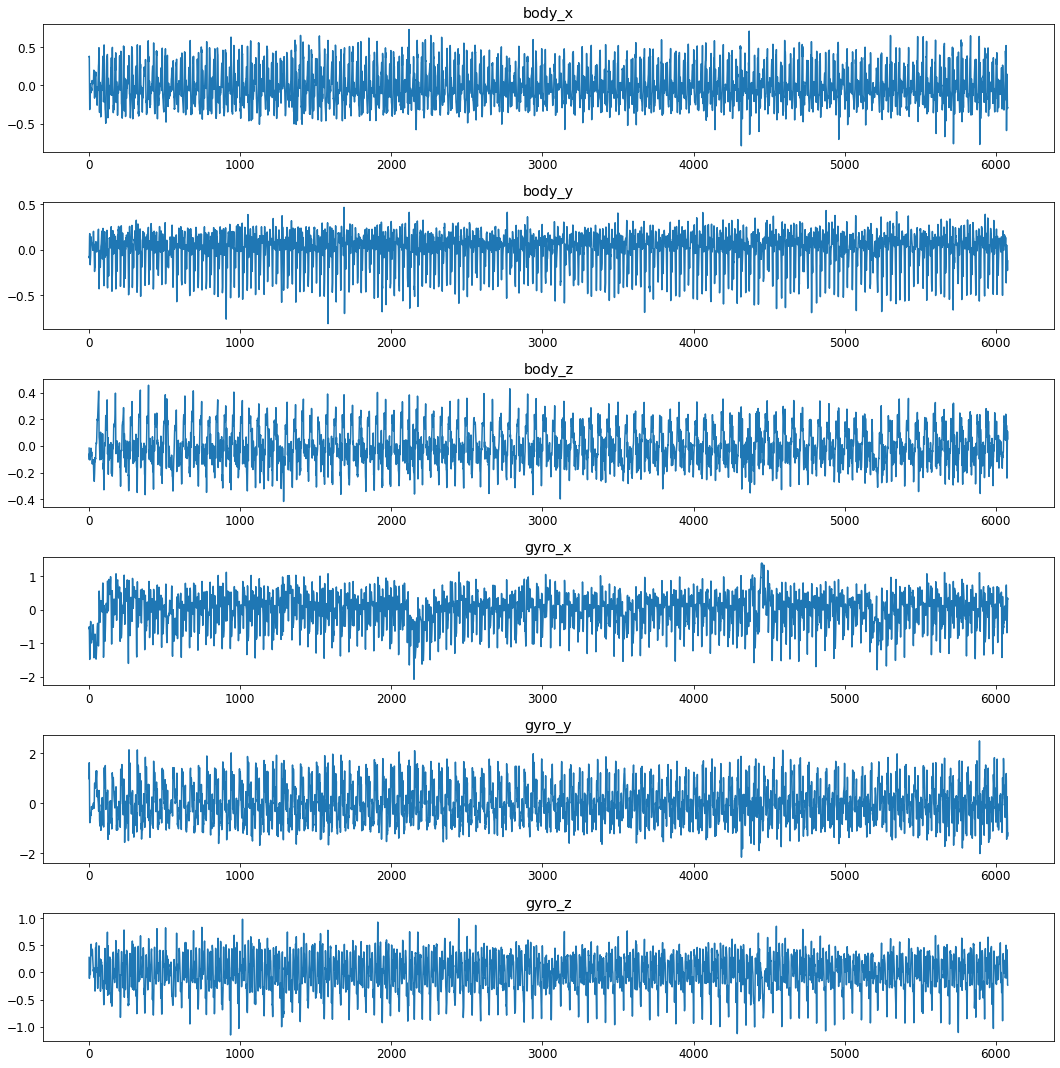

In [13]:
plt.figure(figsize=(15,15), tight_layout=True)
for i, TS in enumerate(df_ts.iloc[0, :-2], 1):
    plt.subplot(6,1,i)
    plt.plot(TS)
    title = df_ts.columns[i-1]
    plt.title(title)
plt.show()

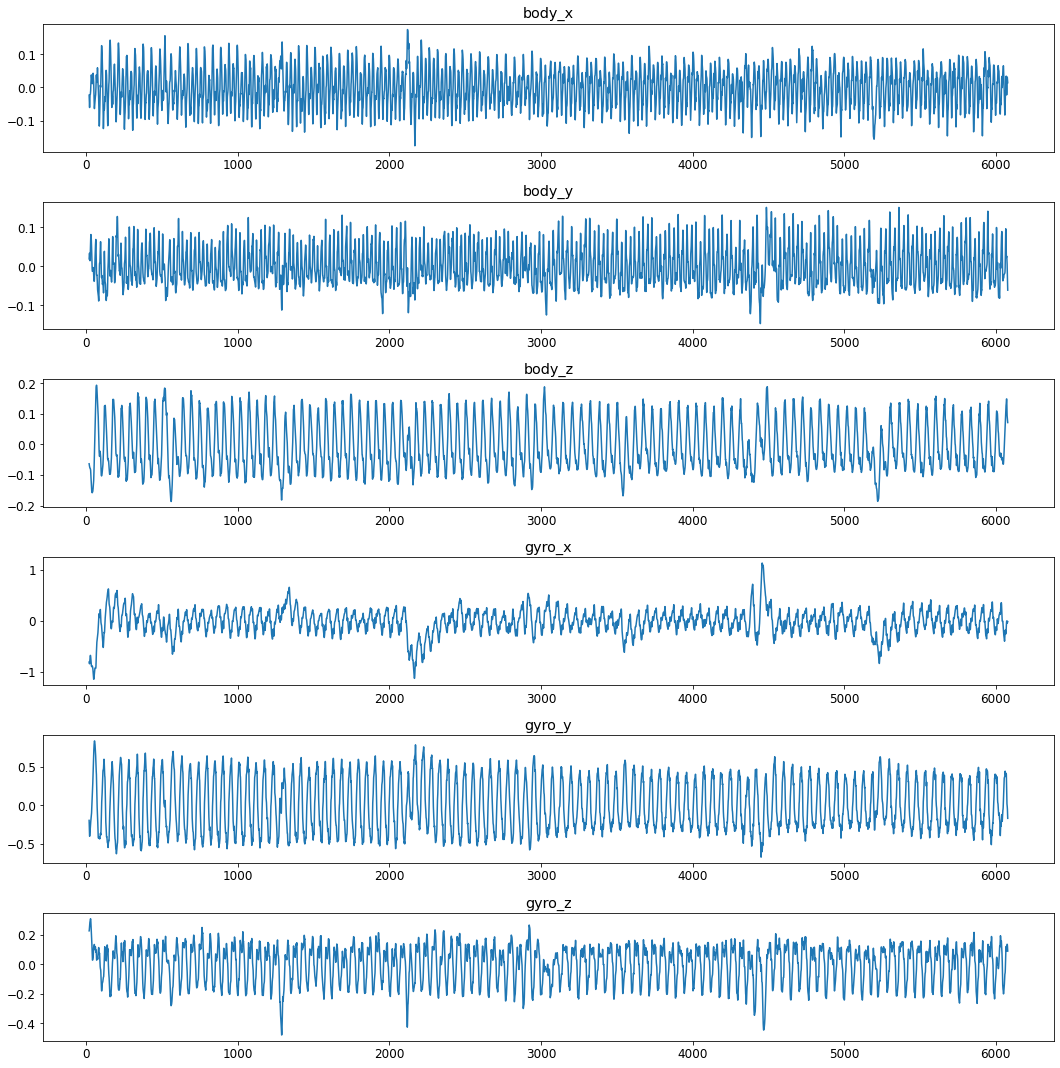

In [14]:
# media mobile 

plt.figure(figsize=(15,15), tight_layout=True)
window = 20
for i, TS in enumerate(df_ts.iloc[0, :-2], 1):
    plt.subplot(6,1,i)
    plt.plot(pd.Series(TS).rolling(window).mean()[window-1:])
    title = df_ts.columns[i-1]
    plt.title(title)
plt.show()